Preprocessing data 1

In [6]:
import pandas as pd
from sklearn import preprocessing

In [10]:
raw_data = pd.read_csv('/content/rawdata.csv')
raw_data.info()
raw_data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33716 entries, 0 to 33715
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Message ID  33716 non-null  int64 
 1   Subject     33427 non-null  object
 2   Message     33345 non-null  object
 3   Spam/Ham    33716 non-null  object
 4   Date        33716 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14
...,...,...,...,...,...
33711,33711,= ? iso - 8859 - 1 ? q ? good _ news _ c = eda...,"hello , welcome to gigapharm onlinne shop .\np...",spam,2005-07-29
33712,33712,all prescript medicines are on special . to be...,i got it earlier than expected and it was wrap...,spam,2005-07-29
33713,33713,the next generation online pharmacy .,are you ready to rock on ? let the man in you ...,spam,2005-07-30
33714,33714,bloow in 5 - 10 times the time,learn how to last 5 - 10 times longer in\nbed ...,spam,2005-07-30


In [11]:
 raw_data.drop(['Message ID', 'Subject', 'Date'], axis=1, inplace=True)
 raw_data

,Message,Spam/Ham
0,NaN,ham
1,"gary , production from the high island larger ...",ham
2,- calpine daily gas nomination 1 . doc,ham
3,fyi - see note below - already done .\nstella\...,ham
4,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham
...,...,...
33711,"hello , welcome to gigapharm onlinne shop .\np...",spam
33712,i got it earlier than expected and it was wrap...,spam
33713,are you ready to rock on ? let the man in you ...,spam
33714,learn how to last 5 - 10 times longer in\nbed ...,spam


In [12]:
# Checking missing
raw_data.isna().sum()

,0
Message,371
Spam/Ham,0


In [13]:
 raw_data.dropna(inplace = True)

In [14]:
# Checking for duplicate values
raw_data.duplicated().sum()

3565

In [15]:
raw_data.drop_duplicates(inplace = True)
raw_data.shape

(29780, 2)

In [16]:
# Replace 'ham' and 'spam' 0,  1, delete columes 'Spam/Ham', rename 'Message' => 'text'
raw_data['label'] = raw_data['Spam/Ham'].map({'ham': 0, 'spam': 1})
raw_data.drop(columns=['Spam/Ham'], inplace=True)
raw_data.rename(columns={'Message': 'text'}, inplace=True)

# Show data
print(raw_data.head())


                                                text  label
1  gary , production from the high island larger ...      0
2             - calpine daily gas nomination 1 . doc      0
3  fyi - see note below - already done .\nstella\...      0
4  fyi .\n- - - - - - - - - - - - - - - - - - - -...      0
5  jackie ,\nsince the inlet to 3 river plant is ...      0


Preprocessing data 2

In [ ]:
raw_data2 = pd.read_csv('/content/rawdata2.csv')
raw_data2

,label,text
0,1,do you feel the pressure to perform and not ri...
1,0,hi i've just updated from the gulus and i chec...
2,1,mega authenticv i a g r a discount pricec i a ...
3,1,hey billy it was really fun going out the othe...
4,1,system of the home it will have the capabiliti...
...,...,...
53663,1,versuchen sie unser produkt und sie werden fuh...
53664,1,while we may have high expectations of our ass...
53665,0,for those who are interested i just cook a lit...
53666,0,hello as i wrote i call sqlfetch channel t stu...


In [ ]:
# Checking for missing values
raw_data2.isna().sum()

,0
label,0
text,0


In [ ]:
# Checking for duplicate values rawdata2
raw_data2.duplicated().sum()

0

combined data

In [ ]:
data = pd.concat([raw_data2, raw_data], ignore_index = True)
data

,label,text
0,1,do you feel the pressure to perform and not ri...
1,0,hi i've just updated from the gulus and i chec...
2,1,mega authenticv i a g r a discount pricec i a ...
3,1,hey billy it was really fun going out the othe...
4,1,system of the home it will have the capabiliti...
...,...,...
83443,1,"hello ,\ndid you ejaculate before or within a ..."
83444,1,"hello , welcome to gigapharm onlinne shop .\np..."
83445,1,i got it earlier than expected and it was wrap...
83446,1,are you ready to rock on ? let the man in you ...


In [ ]:
# Checking for duplicates after combining
data.duplicated().sum()

0

In [ ]:
# Data mixing
data = data.sample(frac=1, random_state = 1)
data

,label,text
48104,1,ounce feather bowl hummingbird opec moment ala...
41270,1,wulvob get your medircations online qnb ikud v...
17204,0,computer connection from cnn com wednesday es...
33996,1,university degree obtain a prosperous future m...
29591,0,thanks for all your answers guys i know i shou...
...,...,...
21440,0,hi given a date how do i get the last date of ...
73349,1,now you can order software on cd or download i...
50057,1,dear valued member canadianpharmacy provides a...
5192,0,subscribe change profile contact us long term ...


In [ ]:
data.to_csv(r"/content/data.csv", index=False)

Create Module

In [2]:
import pandas as pd
df = pd.read_csv("/content/data.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [4]:
spam_count = (df['label'] == 1).sum()  # Số lượng spam
ham_count = (df['label'] == 0).sum()   # Số lượng ham

# Hiển thị kết quả
print(f"Total Spam Emails: {spam_count}")
print(f"Total Ham Emails: {ham_count}")

Total Spam Emails: 43910
Total Ham Emails: 39538


In [ ]:
from sklearn.model_selection import train_test_split
# Split data into training (90%) and testing (10%)
x = df['text']
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # Convert data into matrices
# Convert data into matrices
vectorizer = TfidfVectorizer(max_features=5000, max_df=0.8)
x_trained_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression  # Linear Regression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(x_trained_vectorized, y_train)

# Dự đoán với dữ liệu kiểm tra
y_pred = model.predict(x_test_vectorized)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Convert continuous predictions to binary (classification) predictions
y_pred_class = np.where(y_pred >= 0.5, 1, 0)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred_class))
print('Precision:', precision_score(y_test, y_pred_class))
print('Recall:', recall_score(y_test, y_pred_class))

print('Mean Squared Error: ', mse)
print('R^2 Score: ', r2)

Accuracy: 0.9819053325344518
Precision: 0.9773960216998192
Recall: 0.9883428571428572
Mean Squared Error:  0.029832875678105202
R^2 Score:  0.8803867650136331


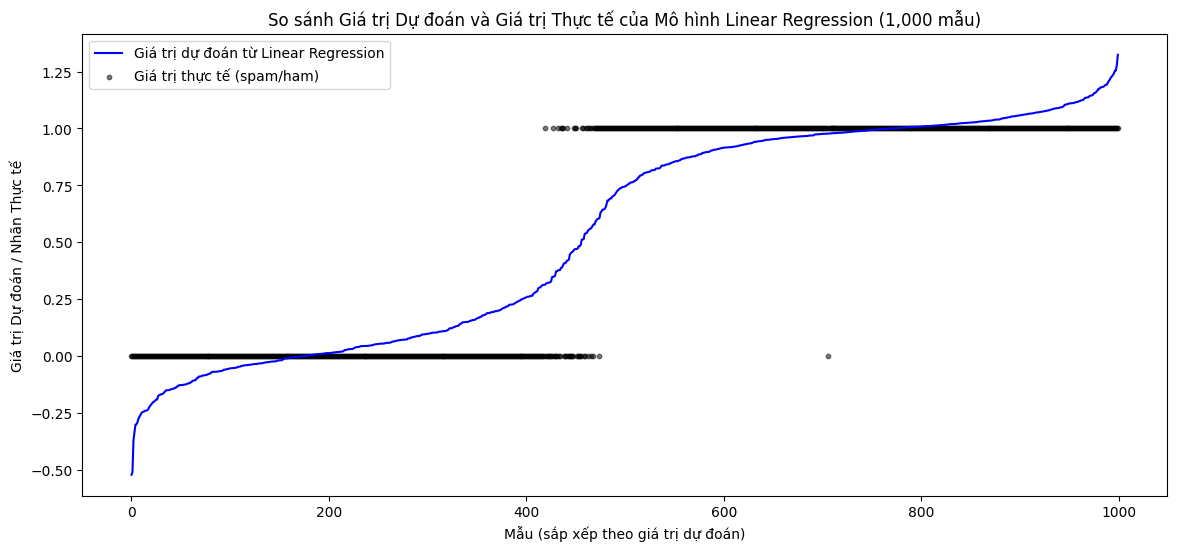

In [ ]:
import matplotlib.pyplot as plt


# Chuyển đổi y_test về dạng numpy array
y_test_array = np.array(y_test)

# Chỉ lấy 1,000 mẫu đầu tiên để dễ quan sát
num_samples = min(1000, len(y_test_array))
y_pred_continuous = y_pred_continuous[:num_samples]
y_test_array = y_test_array[:num_samples]

# Sắp xếp các mẫu theo giá trị dự đoán để có một đường thẳng mượt hơn
sorted_indices = np.argsort(y_pred_continuous)
y_pred_sorted = y_pred_continuous[sorted_indices]
y_test_sorted = y_test_array[sorted_indices]

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))

# Vẽ đường dự đoán từ mô hình Linear Regression
plt.plot(np.arange(num_samples), y_pred_sorted, color="blue", label="Giá trị dự đoán từ Linear Regression")

# Vẽ các điểm dữ liệu thực tế (nhãn nhị phân) sau khi sắp xếp
plt.scatter(np.arange(num_samples), y_test_sorted, color="black", marker="o", label="Giá trị thực tế (spam/ham)", alpha=0.5, s=10)


plt.title("So sánh Giá trị Dự đoán và Giá trị Thực tế của Mô hình Linear Regression (1,000 mẫu)")
plt.xlabel("Mẫu (sắp xếp theo giá trị dự đoán)")
plt.ylabel("Giá trị Dự đoán / Nhãn Thực tế")
plt.legend()

# Hiển thị biểu đồ
plt.show()


Mô hình không tạo ra đường thẳng  do dữ liệu đầu vào sau khi vector hóa không thể hiện một mối quan hệ tuyến tính => không phù hợp

In [ ]:
from sklearn.linear_model import LogisticRegression  # Logistic Regression

# Huấn luyện mô hình logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(x_trained_vectorized, y_train)

# Dự đoán và đánh giá
y_pred = logistic_model.predict(x_test_vectorized)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))

Accuracy: 0.9826243259436789
Precision: 0.9776422764227642
Recall: 0.9894857142857143


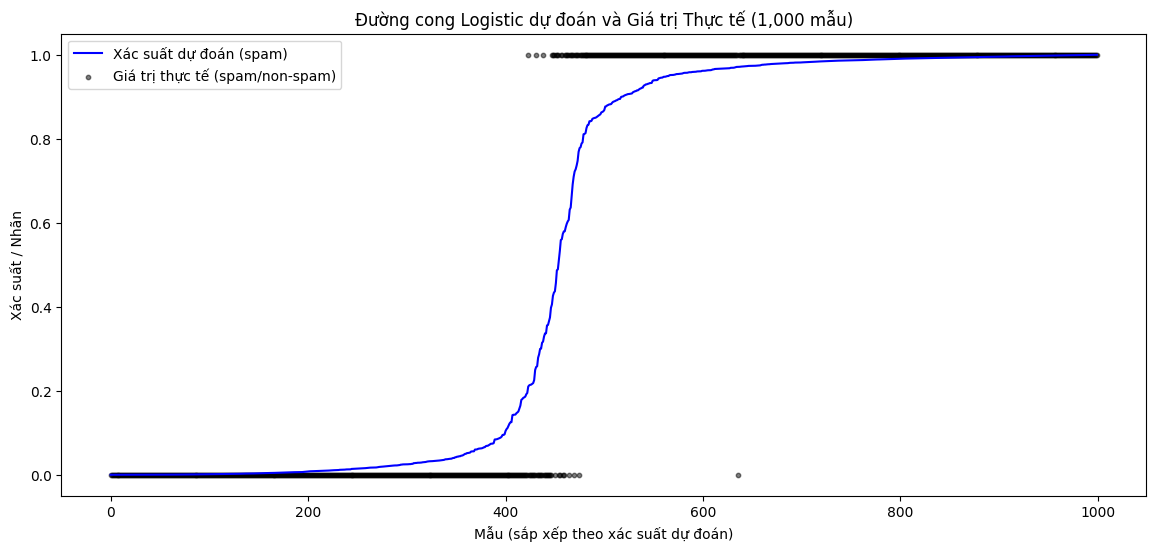

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dự đoán xác suất từ mô hình Logistic Regression
y_prob = logistic_model.predict_proba(x_test_vectorized)[:, 1]  # Lấy xác suất cho lớp 1 (spam)

# Chuyển đổi y_test về dạng numpy array và lấy 1,000 mẫu đầu tiên
y_test_array = np.array(y_test)[:1000]
y_prob_array = y_prob[:1000]

# Sắp xếp các giá trị dự đoán và nhãn thực tế theo xác suất dự đoán tăng dần
sorted_indices = np.argsort(y_prob_array)
y_prob_sorted = y_prob_array[sorted_indices]
y_test_sorted = y_test_array[sorted_indices]

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))

# Vẽ đường cong xác suất dự đoán sau khi sắp xếp
plt.plot(np.arange(1000), y_prob_sorted, color="blue", label="Xác suất dự đoán (spam)")

# Vẽ các điểm dữ liệu thực tế (nhãn nhị phân) sau khi sắp xếp
plt.scatter(np.arange(1000), y_test_sorted, color="black", marker="o", label="Giá trị thực tế (spam/non-spam)", alpha=0.5, s=10)

# Thêm tiêu đề và nhãn
plt.title("Đường cong Logistic dự đoán và Giá trị Thực tế (1,000 mẫu)")
plt.xlabel("Mẫu (sắp xếp theo xác suất dự đoán)")
plt.ylabel("Xác suất / Nhãn")
plt.legend()

# Hiển thị biểu đồ
plt.show()


Mô hình này phù hợp

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Training the MultinomialNB and Evaluate

model = MultinomialNB()
# Train the model
model.fit(x_trained_vectorized, y_train)
# Predict with test data
y_pred = model.predict(x_test_vectorized)

# Evaluate the model
predictions = model.predict(x_test_vectorized)
print('Accuracy: ', accuracy_score(y_test, predictions))
print('Precision: ', precision_score(y_test, predictions))
print('Recall: ', recall_score(y_test, predictions))

Accuracy:  0.9608148591971241
Precision:  0.9680851063829787
Recall:  0.9568


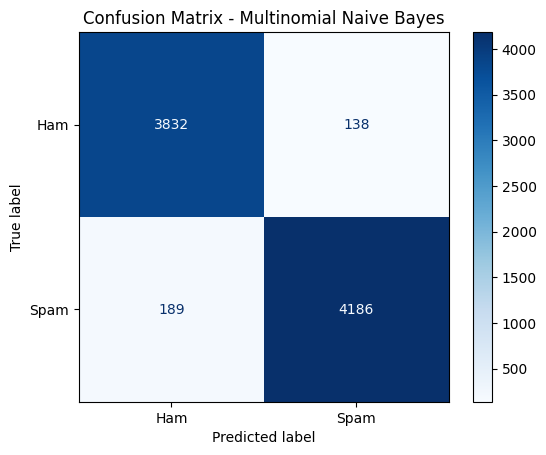

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Tạo confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Vẽ confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Ham", "Spam"])
disp.plot(cmap="Blues")  # Sử dụng cmap để làm cho màu sắc dễ nhìn hơn
plt.title("Confusion Matrix - Multinomial Naive Bayes")
plt.show()


Mô hình naive_bayes vẫn phù hợp

In [ ]:
from sklearn.svm import SVC
# Tạo mô hình SVM
model = SVC(kernel='linear')  # Sử dụng kernel tuyến tính

# Huấn luyện mô hình
model.fit(x_trained_vectorized, y_train)

# Dự đoán với dữ liệu kiểm tra
y_pred = model.predict(x_test_vectorized)

# Đánh giá mô hình
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='weighted'))

Accuracy:  0.9849011384062313
Precision:  0.9849388044154436
Recall:  0.9849011384062313


In [ ]:
import joblib

# Lưu mô hình vào file
joblib.dump(model, 'svm_model.joblib')

['svm_model.joblib']

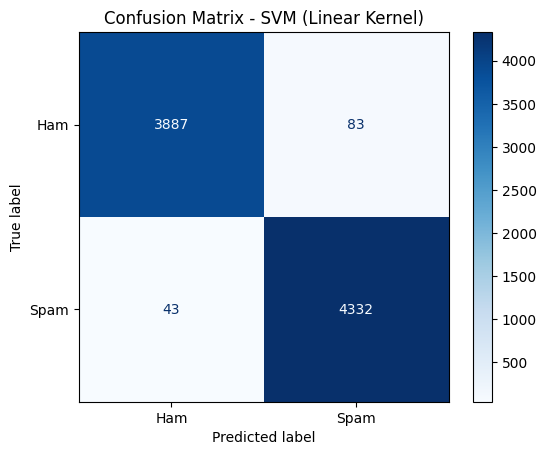

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Tạo Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Vẽ Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Ham", "Spam"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - SVM (Linear Kernel)")
plt.show()


Mô hình mô hình SVM tốt hơn NB

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Mô hình Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(x_trained_vectorized, y_train)
y_pred_dt = decision_tree_model.predict(x_test_vectorized)

# Đánh giá mô hình Decision Tree
print('Decision Tree:')
print('Accuracy: ', accuracy_score(y_test, y_pred_dt))
print('Precision: ', precision_score(y_test, y_pred_dt, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred_dt, average='weighted'))


Decision Tree:
Accuracy:  0.9592570401437986
Precision:  0.9592581169617386
Recall:  0.9592570401437986


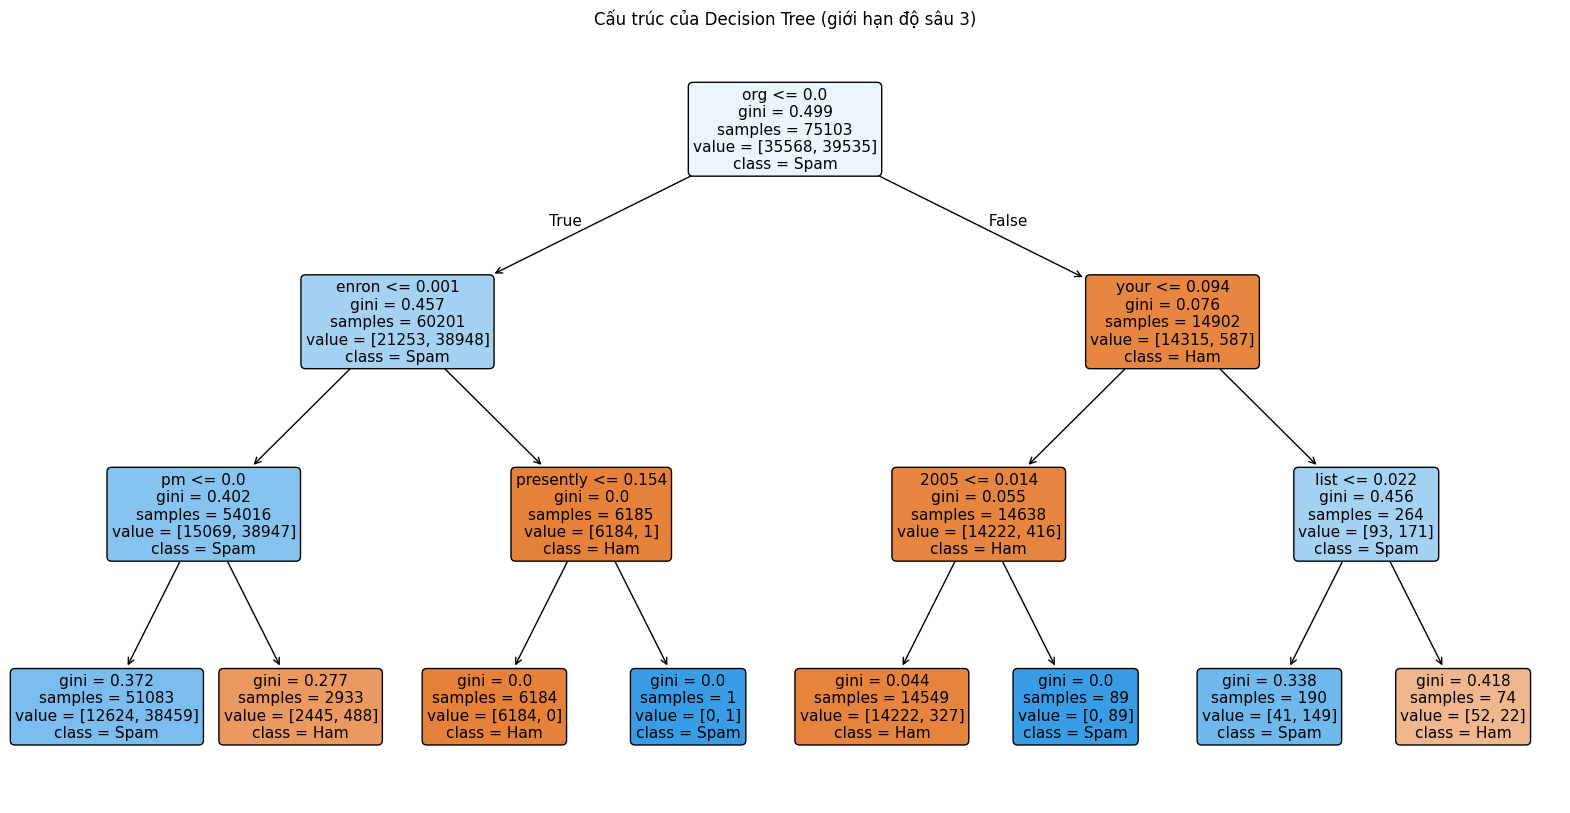

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(decision_tree_model, max_depth=3, filled=True, rounded=True, class_names=["Ham", "Spam"], feature_names=vectorizer.get_feature_names_out())
plt.title("Cấu trúc của Decision Tree (giới hạn độ sâu 3)")
plt.show()

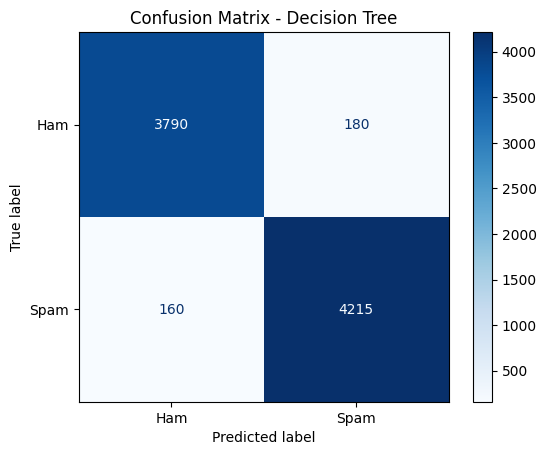

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Tạo Confusion Matrix cho Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Vẽ Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=["Ham", "Spam"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


Decision Tree có thể phát hiện spam hiệu quả hơn nhưng dễ mắc lỗi khi phân loại ham, điều này có thể dẫn đến một số email hợp lệ (ham) bị gắn nhãn là spam.


Decision Tree có khả năng phát hiện email spam tốt hơn so với Multinomial Naive Bayes, nhưng có tỷ lệ sai số cao hơn trong việc xác định ham.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Mô hình Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(x_trained_vectorized, y_train)
y_pred_rf = random_forest_model.predict(x_test_vectorized)

# Đánh giá mô hình Random Forest
print('Random Forest:')
print('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print('Precision: ', precision_score(y_test, y_pred_rf, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred_rf, average='weighted'))

Random Forest:
Accuracy:  0.9856201318154584
Precision:  0.9857108722968126
Recall:  0.9856201318154584


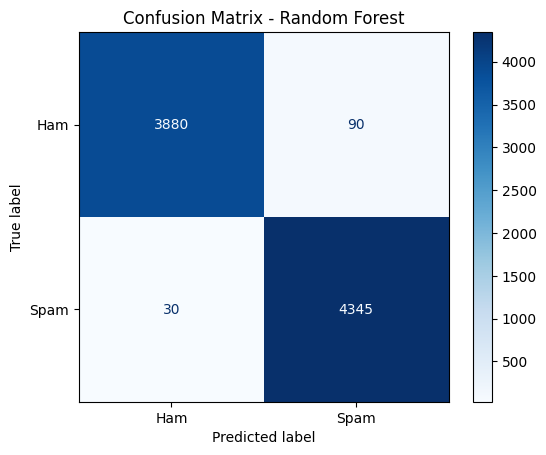

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Tạo Confusion Matrix cho Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Vẽ Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=["Ham", "Spam"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()


=> Mô hình SVM vẫn là mô hình cho kết quả tốt nhất

In [ ]:
# Tải lại mô hình từ file
loaded_model = joblib.load('svm_model.joblib')

# test với dữ liệu thật
test_emails = [
    # Spam emails
    "Congratulations! You've won a $500 Amazon gift card. Claim now!",
    "Get rich quick! Earn $1000 per day from home with no experience.",
    "You've been selected for a special prize. Click to claim!",
    "Act fast! Limited-time offer on premium products. Buy now!",
    "Your account has been compromised. Please verify your details.",
    "Get 50% off on all items in our store. Don’t miss this offer!",
    "You are eligible for a loan up to $50,000. Apply now!",
    "Claim your free vacation to Hawaii. Just one click away!",
    "Exclusive offer for you! Save big on new gadgets.",
    "Lowest prices ever on health supplements. Buy today!",
    "Meet singles in your area! Join now for free.",
    "Immediate action required. Your account will be suspended.",
    "Amazing weight loss secrets revealed. Try it now!",
    "Earn money while you sleep! Join our program today.",
    "Work from home and make $500 daily. Sign up now!",
    "Limited seats available for our investment webinar. Register today!",
    "You’re a winner! Claim your iPhone 13 Pro now.",
    "Hurry! This deal expires in 24 hours.",
    "Free samples! Get your favorite products delivered to you.",
    "Congratulations, you have been selected for a $100 gift card!",
    "Hot singles in your area. Chat now for free.",
    "Amazing discounts on luxury watches. Shop now!",
    "Last chance to save big on holiday deals!",
    "Lose weight fast with our new diet pills. Order now!",
    "Complete your profile to earn exclusive rewards.",
    "Congratulations! Your prize awaits. Click here!",
    "Hurry, these deals won’t last long! Up to 70% off.",
    "Unlock the secrets to making $10,000 per month.",
    "Special offer! Get your favorite perfumes at half price.",
    "Get a free trial of our fitness program today!",
    "Need cash? Get approved for a personal loan today.",
    "Congratulations! You have a chance to win $1,000!",
    "Cheap flights available! Book now and save big.",
    "Instant approval on all credit applications. Apply now!",
    "Earn rewards by completing surveys online. Join us now!",
    "Limited offer! Get premium access for free.",
    "Win big! Join our casino and get a bonus.",
    "Save 40% on all our supplements. Buy now!",
    "Claim your exclusive reward before it expires.",
    "Double your investment in just one month! Learn more.",
    "Free shipping on all orders today only!",
    "Get a free gift with every purchase. Offer ends soon.",
    "Unlock secret deals in our exclusive club.",
    "You have won a brand new car! Claim it now.",
    "Amazing holiday deals on electronics. Shop now!",
    "Work from home and earn up to $1,000 a day.",
    "Your dream vacation is just a click away. Book now!",
    "Unlock VIP benefits with our loyalty program.",
    "Get a free trial of our premium service. Sign up today!",
    "Hot deals on top-brand laptops. Limited stock!",
    "Invest in real estate with zero money down.",
    "Congratulations, you're our lucky winner!",
    "Amazing discounts on home essentials. Buy today!",
    "Discover how to make money online. Free guide!",
    "Win big with our new slot games. Play now!",
    "Special discount on all beauty products. Shop now!",
    "Find out how to earn $5,000 in a week!",
    "Double cashback on all purchases. Sign up now!",
    "Win a free shopping spree! Enter now.",
    "Earn easy money with our new affiliate program.",
    "Get up to 75% off on top brands. Hurry!",
    "Hot investment tips from top experts. Learn now!",
    "Meet like-minded people in your area. Join for free.",
    "New fitness secrets revealed. Try it today!",
    "Exclusive deals on top electronics. Limited time!",
    "Find love today. Free registration!",
    "Unlock exclusive rewards by joining our club.",
    "Need extra cash? Get a personal loan today!",
    "Earn cash for every survey you complete.",
    "Get up to 50% off on all beauty products.",
    "Win amazing prizes in our weekly lottery!",
    "Congratulations! You've won a $500 cash prize!",

    # Ham emails
    "Team meeting scheduled for Tuesday at 10 AM.",
    "Project update: Timeline and deliverables.",
    "Don't forget to submit your timesheet by Friday.",
    "Annual performance reviews start next month.",
    "Invoice for October has been generated.",
    "Holiday schedule: Office closed on December 25.",
    "Meeting notes from yesterday's session.",
    "Reminder: Complete your health insurance form.",
    "Please review the attached contract.",
    "Invitation to join the company picnic next Saturday.",
    "New company policy on remote work announced.",
    "Monthly newsletter: October edition.",
    "Welcome our new team members!",
    "Update on the office renovation project.",
    "Important: Cybersecurity awareness training.",
    "Reminder: Submit your feedback on the survey.",
    "Annual company event details inside.",
    "Invitation to the leadership workshop.",
    "Expense report guidelines and deadline.",
    "IT maintenance scheduled for this weekend.",
    "Benefits enrollment period ends next week.",
    "Team lunch scheduled for Friday noon.",
    "Reminder: Register for the upcoming webinar.",
    "Quarterly sales report available for review.",
    "Your scheduled 1:1 meeting with your manager.",
    "New resources available in the employee portal.",
    "Reminder: Complete your annual compliance training.",
    "Upcoming changes to the company holiday policy.",
    "Payroll schedule for the next fiscal year.",
    "Happy Birthday to our October team members!"
]

# Vector hóa dữ liệu thật
test_emails_vectorized = vectorizer.transform(test_emails)

# Dự đoán nhãn cho dữ liệu thật
y_pred_test = loaded_model.predict(test_emails_vectorized)

# In kết quả
for email, label in zip(test_emails, y_pred_test):
    print(f"Email: {email}")
    print(f"Predicted Label: {'Spam' if label == 1 else 'Ham'}")
    print("-" * 50)


Email: Congratulations! You've won a $500 Amazon gift card. Claim now!
Predicted Label: Spam
--------------------------------------------------
Email: Get rich quick! Earn $1000 per day from home with no experience.
Predicted Label: Spam
--------------------------------------------------
Email: You've been selected for a special prize. Click to claim!
Predicted Label: Spam
--------------------------------------------------
Email: Act fast! Limited-time offer on premium products. Buy now!
Predicted Label: Spam
--------------------------------------------------
Email: Your account has been compromised. Please verify your details.
Predicted Label: Spam
--------------------------------------------------
Email: Get 50% off on all items in our store. Don’t miss this offer!
Predicted Label: Spam
--------------------------------------------------
Email: You are eligible for a loan up to $50,000. Apply now!
Predicted Label: Spam
--------------------------------------------------
Email: Claim yo

Dự đoán đúng: 70 (spam) + 18 (ham) = 88
Dự đoán sai: 2 (spam nhầm thành ham) + 12 (ham nhầm thành spam) = 14